# Carbon emission visualization

<hr>

This notebook provides a clear and impactful visualization of carbon emissions for each of the algorithms analyzed. Understanding these emissions is crucial both for awareness and for making informed comparisons between models.

<hr>


In [1]:
# Import needed libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load data
df_gpu = pd.concat([
    pd.read_csv('../2-GP-Implementation/emissions-gpu.csv', index_col='project_name'),
    pd.read_csv('../3-GP-Optimization/emissions-gpu.csv', index_col='project_name'),
    pd.read_csv('../4-Alternative-Models/emissions-gpu.csv', index_col='project_name')
])
df_cpu = pd.concat([
    pd.read_csv('../2-GP-Implementation/emissions-cpu.csv', index_col='project_name'),
    pd.read_csv('../3-GP-Optimization/emissions-cpu.csv', index_col='project_name'),
    pd.read_csv('../4-Alternative-Models/emissions-cpu.csv', index_col='project_name')
])

# Remove irrelevant data for the analysis
df_gpu.index.name = None
df_cpu.index.name = None
columns_to_drop = ['timestamp', 'run_id', 'experiment_id', 'country_name', 'country_iso_code',
                   'region', 'cloud_provider', 'cloud_region', 'os', 'python_version',
                   'codecarbon_version', 'cpu_count', 'ram_total_size', 'longitude', 'latitude',
                   'tracking_mode', 'on_cloud']

df_gpu.drop(columns=columns_to_drop, inplace=True)
df_cpu.drop(columns=columns_to_drop, inplace=True)

# Split into model and optimization dataframes
gp_mod_gpu = df_gpu[df_gpu.index.str.contains('GP') & df_gpu.index.str.contains('model')]
alt_mod_gpu = df_gpu[~df_gpu.index.str.contains('GP') & df_gpu.index.str.contains('model')]
gp_opt_gpu = df_gpu[df_gpu.index.str.contains('GP') & df_gpu.index.str.contains('optimization')]
alt_opt_gpu = df_gpu[~df_gpu.index.str.contains('GP') & df_gpu.index.str.contains('optimization')]

gp_mod_cpu = df_cpu[df_cpu.index.str.contains('GP') & df_cpu.index.str.contains('model')]
alt_mod_cpu = df_cpu[~df_cpu.index.str.contains('GP') & df_cpu.index.str.contains('model')]
gp_opt_cpu = df_cpu[df_cpu.index.str.contains('GP') & df_cpu.index.str.contains('optimization')]
alt_opt_cpu = df_cpu[~df_cpu.index.str.contains('GP') & df_cpu.index.str.contains('optimization')]

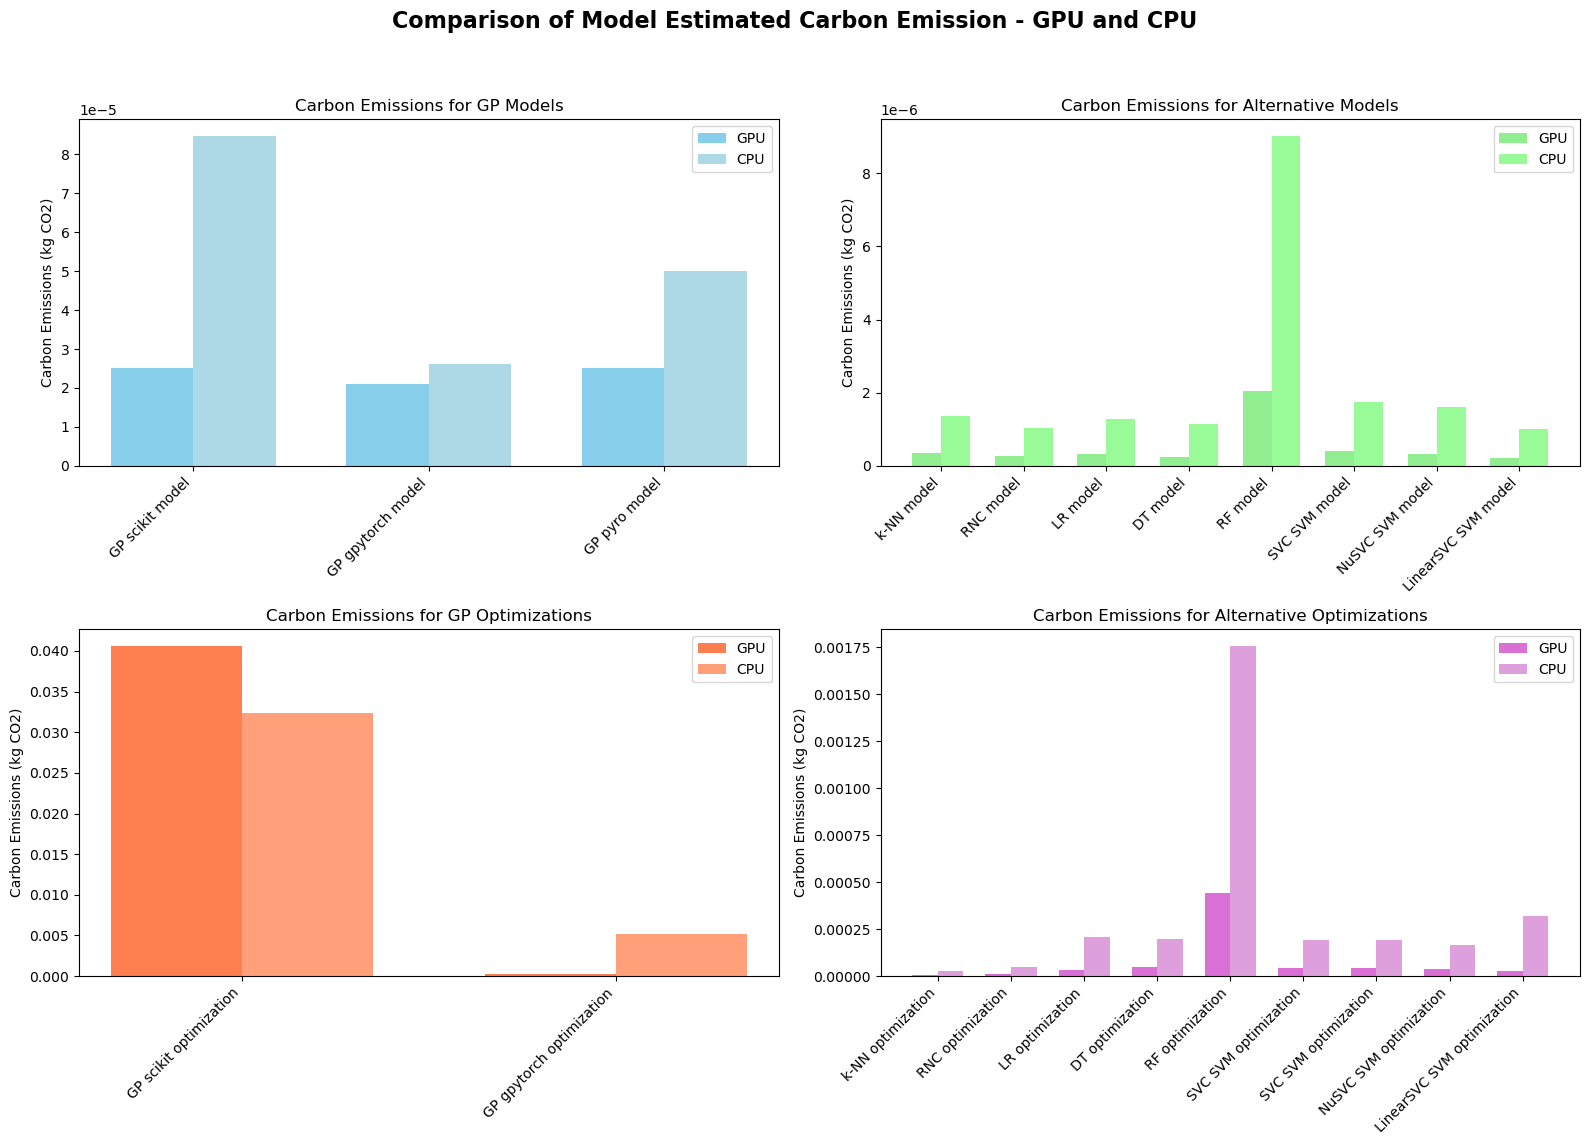

In [3]:
# Set up the figure with 4 subplots for Carbon Emissions (GPU and CPU side-by-side)
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
width = 0.35
x = np.arange(len(gp_mod_gpu.index))

# Plot for GP Models
axs[0, 0].bar(x - width/2, gp_mod_gpu['emissions'], width, color='skyblue', label='GPU')
axs[0, 0].bar(x + width/2, gp_mod_cpu['emissions'], width, color='lightblue', label='CPU')
axs[0, 0].set_title('Carbon Emissions for GP Models')
axs[0, 0].set_ylabel('Carbon Emissions (kg CO2)')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(gp_mod_gpu.index, rotation=45, ha='right')
axs[0, 0].legend()

# Plot for Alternative Models
x = np.arange(len(alt_mod_gpu.index))
axs[0, 1].bar(x - width/2, alt_mod_gpu['emissions'], width, color='lightgreen', label='GPU')
axs[0, 1].bar(x + width/2, alt_mod_cpu['emissions'], width, color='palegreen', label='CPU')
axs[0, 1].set_title('Carbon Emissions for Alternative Models')
axs[0, 1].set_ylabel('Carbon Emissions (kg CO2)')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(alt_mod_gpu.index, rotation=45, ha='right')
axs[0, 1].legend()

# Plot for GP Optimizations
x = np.arange(len(gp_opt_gpu.index))
axs[1, 0].bar(x - width/2, gp_opt_gpu['emissions'], width, color='coral', label='GPU')
axs[1, 0].bar(x + width/2, gp_opt_cpu['emissions'], width, color='lightsalmon', label='CPU')
axs[1, 0].set_title('Carbon Emissions for GP Optimizations')
axs[1, 0].set_ylabel('Carbon Emissions (kg CO2)')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(gp_opt_gpu.index, rotation=45, ha='right')
axs[1, 0].legend()

# Plot for Alternative Optimizations
x = np.arange(len(alt_opt_gpu.index))
axs[1, 1].bar(x - width/2, alt_opt_gpu['emissions'], width, color='orchid', label='GPU')
axs[1, 1].bar(x + width/2, alt_opt_cpu['emissions'], width, color='plum', label='CPU')
axs[1, 1].set_title('Carbon Emissions for Alternative Optimizations')
axs[1, 1].set_ylabel('Carbon Emissions (kg CO2)')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(alt_opt_gpu.index, rotation=45, ha='right')
axs[1, 1].legend()

# Adjust layout for better spacing
fig.suptitle('Comparison of Model Estimated Carbon Emission - GPU and CPU', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

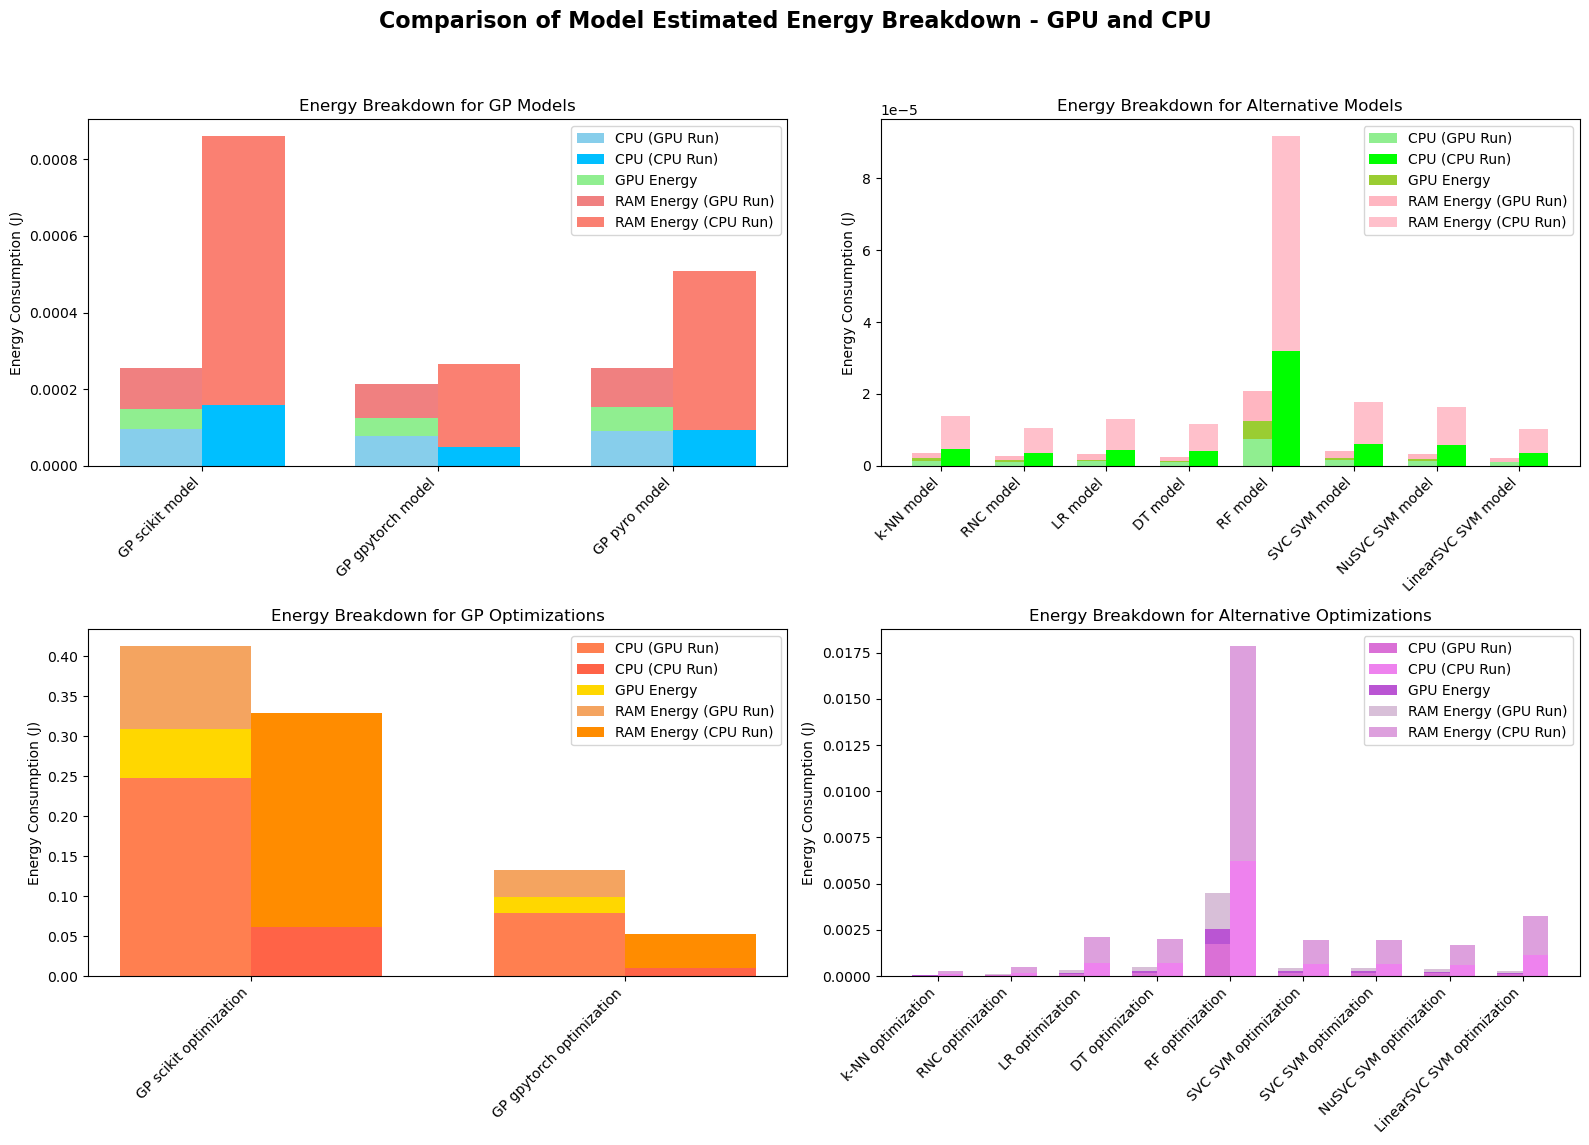

In [4]:

# Set up the figure with 4 subplots for Energy Breakdown (GPU and CPU side-by-side)
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot for GP Models Energy Breakdown
x = np.arange(len(gp_mod_gpu.index))
axs[0, 0].bar(x - width/2, gp_mod_gpu['cpu_energy'], width, color='skyblue', label='CPU (GPU Run)')
axs[0, 0].bar(x + width/2, gp_mod_cpu['cpu_energy'], width, color='deepskyblue', label='CPU (CPU Run)')
axs[0, 0].bar(x - width/2, gp_mod_gpu['gpu_energy'], width, bottom=gp_mod_gpu['cpu_energy'], color='lightgreen', label='GPU Energy')
axs[0, 0].bar(x - width/2, gp_mod_gpu['ram_energy'], width, bottom=gp_mod_gpu['cpu_energy'] + gp_mod_gpu['gpu_energy'], color='lightcoral', label='RAM Energy (GPU Run)')
axs[0, 0].bar(x + width/2, gp_mod_cpu['ram_energy'], width, bottom=gp_mod_cpu['cpu_energy'], color='salmon', label='RAM Energy (CPU Run)')
axs[0, 0].set_title('Energy Breakdown for GP Models')
axs[0, 0].set_ylabel('Energy Consumption (J)')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(gp_mod_gpu.index, rotation=45, ha='right')
axs[0, 0].legend()

# Plot for Alternative Models Energy Breakdown
x = np.arange(len(alt_mod_gpu.index))
axs[0, 1].bar(x - width/2, alt_mod_gpu['cpu_energy'], width, color='lightgreen', label='CPU (GPU Run)')
axs[0, 1].bar(x + width/2, alt_mod_cpu['cpu_energy'], width, color='lime', label='CPU (CPU Run)')
axs[0, 1].bar(x - width/2, alt_mod_gpu['gpu_energy'], width, bottom=alt_mod_gpu['cpu_energy'], color='yellowgreen', label='GPU Energy')
axs[0, 1].bar(x - width/2, alt_mod_gpu['ram_energy'], width, bottom=alt_mod_gpu['cpu_energy'] + alt_mod_gpu['gpu_energy'], color='lightpink', label='RAM Energy (GPU Run)')
axs[0, 1].bar(x + width/2, alt_mod_cpu['ram_energy'], width, bottom=alt_mod_cpu['cpu_energy'], color='pink', label='RAM Energy (CPU Run)')
axs[0, 1].set_title('Energy Breakdown for Alternative Models')
axs[0, 1].set_ylabel('Energy Consumption (J)')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(alt_mod_gpu.index, rotation=45, ha='right')
axs[0, 1].legend()

# Plot for GP Optimizations Energy Breakdown
x = np.arange(len(gp_opt_gpu.index))
axs[1, 0].bar(x - width/2, gp_opt_gpu['cpu_energy'], width, color='coral', label='CPU (GPU Run)')
axs[1, 0].bar(x + width/2, gp_opt_cpu['cpu_energy'], width, color='tomato', label='CPU (CPU Run)')
axs[1, 0].bar(x - width/2, gp_opt_gpu['gpu_energy'], width, bottom=gp_opt_gpu['cpu_energy'], color='gold', label='GPU Energy')
axs[1, 0].bar(x - width/2, gp_opt_gpu['ram_energy'], width, bottom=gp_opt_gpu['cpu_energy'] + gp_opt_gpu['gpu_energy'], color='sandybrown', label='RAM Energy (GPU Run)')
axs[1, 0].bar(x + width/2, gp_opt_cpu['ram_energy'], width, bottom=gp_opt_cpu['cpu_energy'], color='darkorange', label='RAM Energy (CPU Run)')
axs[1, 0].set_title('Energy Breakdown for GP Optimizations')
axs[1, 0].set_ylabel('Energy Consumption (J)')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(gp_opt_gpu.index, rotation=45, ha='right')
axs[1, 0].legend()

# Plot for Alternative Optimizations Energy Breakdown
x = np.arange(len(alt_opt_gpu.index))
axs[1, 1].bar(x - width/2, alt_opt_gpu['cpu_energy'], width, color='orchid', label='CPU (GPU Run)')
axs[1, 1].bar(x + width/2, alt_opt_cpu['cpu_energy'], width, color='violet', label='CPU (CPU Run)')
axs[1, 1].bar(x - width/2, alt_opt_gpu['gpu_energy'], width, bottom=alt_opt_gpu['cpu_energy'], color='mediumorchid', label='GPU Energy')
axs[1, 1].bar(x - width/2, alt_opt_gpu['ram_energy'], width, bottom=alt_opt_gpu['cpu_energy'] + alt_opt_gpu['gpu_energy'], color='thistle', label='RAM Energy (GPU Run)')
axs[1, 1].bar(x + width/2, alt_opt_cpu['ram_energy'], width, bottom=alt_opt_cpu['cpu_energy'], color='plum', label='RAM Energy (CPU Run)')
axs[1, 1].set_title('Energy Breakdown for Alternative Optimizations')
axs[1, 1].set_ylabel('Energy Consumption (J)')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(alt_opt_gpu.index, rotation=45, ha='right')
axs[1, 1].legend()

# Adjust layout for better spacing
fig.suptitle('Comparison of Model Estimated Energy Breakdown - GPU and CPU', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

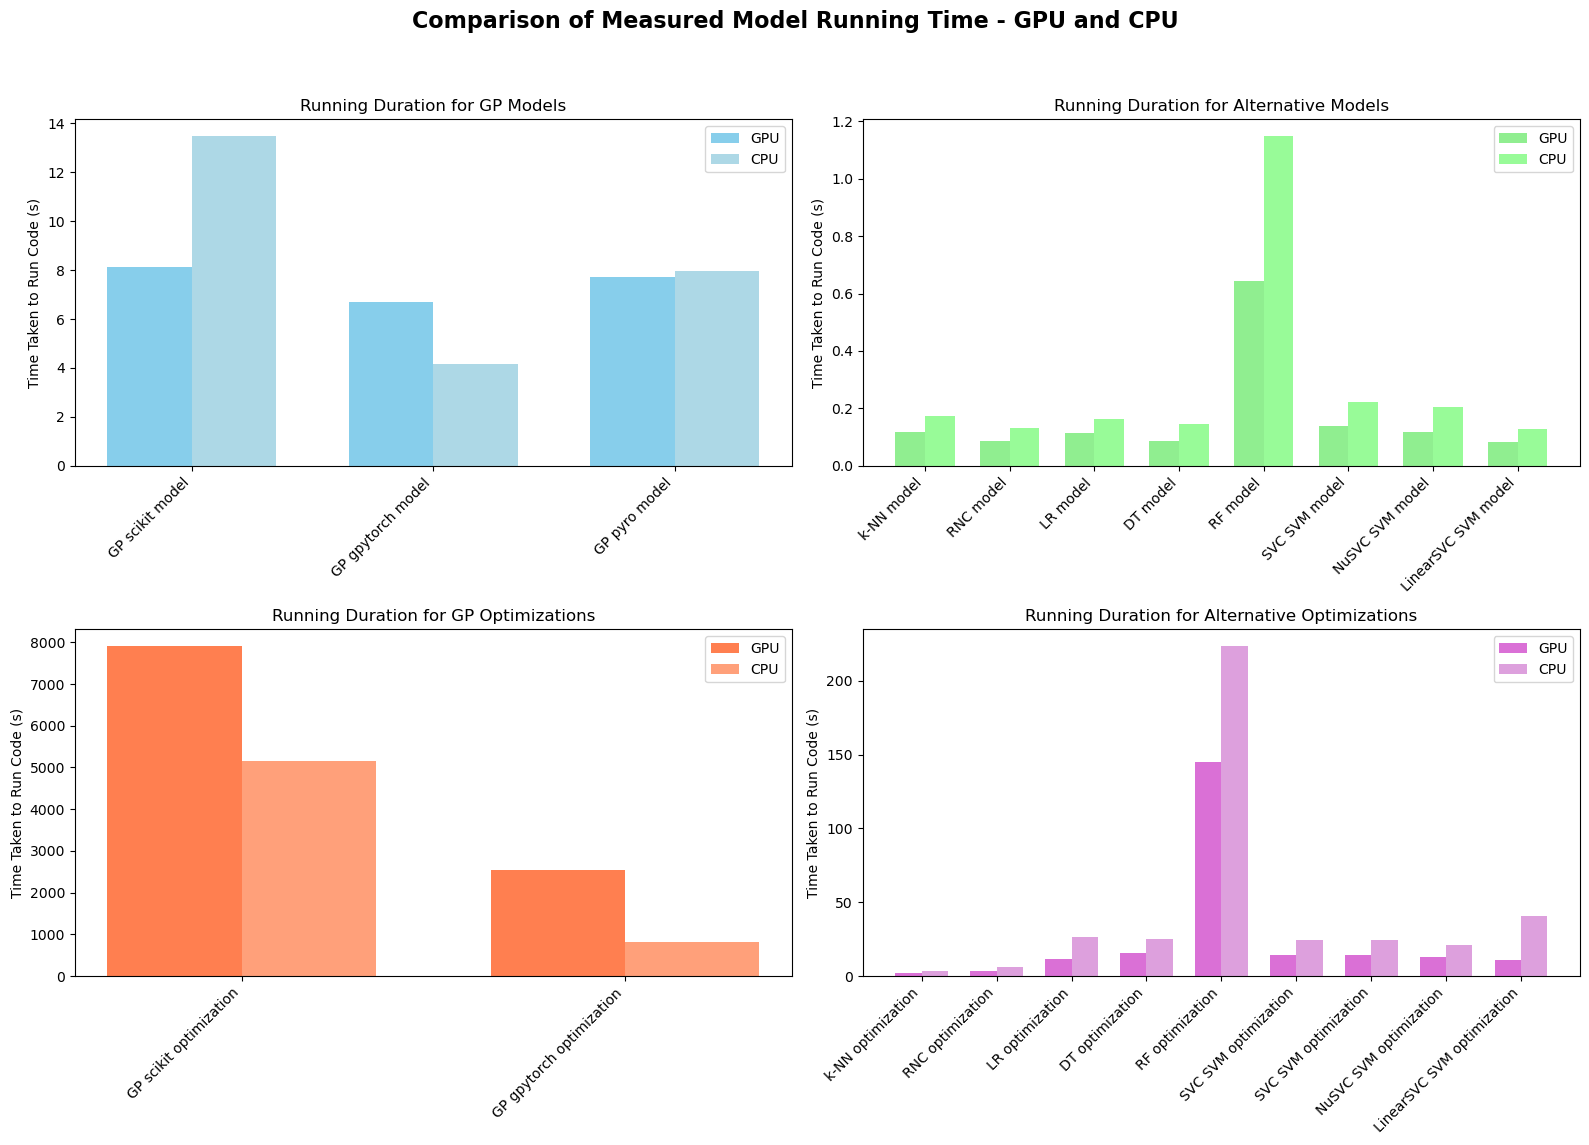

In [5]:
# Set up the figure with 4 subplots for time taken to run (GPU and CPU side-by-side)
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
width = 0.35
x = np.arange(len(gp_mod_gpu.index))

# Plot for GP Models
axs[0, 0].bar(x - width/2, gp_mod_gpu['duration'], width, color='skyblue', label='GPU')
axs[0, 0].bar(x + width/2, gp_mod_cpu['duration'], width, color='lightblue', label='CPU')
axs[0, 0].set_title('Running Duration for GP Models')
axs[0, 0].set_ylabel('Time Taken to Run Code (s)')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(gp_mod_gpu.index, rotation=45, ha='right')
axs[0, 0].legend()

# Plot for Alternative Models
x = np.arange(len(alt_mod_gpu.index))
axs[0, 1].bar(x - width/2, alt_mod_gpu['duration'], width, color='lightgreen', label='GPU')
axs[0, 1].bar(x + width/2, alt_mod_cpu['duration'], width, color='palegreen', label='CPU')
axs[0, 1].set_title('Running Duration for Alternative Models')
axs[0, 1].set_ylabel('Time Taken to Run Code (s)')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(alt_mod_gpu.index, rotation=45, ha='right')
axs[0, 1].legend()

# Plot for GP Optimizations
x = np.arange(len(gp_opt_gpu.index))
axs[1, 0].bar(x - width/2, gp_opt_gpu['duration'], width, color='coral', label='GPU')
axs[1, 0].bar(x + width/2, gp_opt_cpu['duration'], width, color='lightsalmon', label='CPU')
axs[1, 0].set_title('Running Duration for GP Optimizations')
axs[1, 0].set_ylabel('Time Taken to Run Code (s)')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(gp_opt_gpu.index, rotation=45, ha='right')
axs[1, 0].legend()

# Plot for Alternative Optimizations
x = np.arange(len(alt_opt_gpu.index))
axs[1, 1].bar(x - width/2, alt_opt_gpu['duration'], width, color='orchid', label='GPU')
axs[1, 1].bar(x + width/2, alt_opt_cpu['duration'], width, color='plum', label='CPU')
axs[1, 1].set_title('Running Duration for Alternative Optimizations')
axs[1, 1].set_ylabel('Time Taken to Run Code (s)')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(alt_opt_gpu.index, rotation=45, ha='right')
axs[1, 1].legend()

# Adjust layout for better spacing
fig.suptitle('Comparison of Measured Model Running Time - GPU and CPU', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()